In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Natural Language Processing with Disaster Tweets - Kaggle Competition

## Project Description

This project involves participating in the Kaggle competition "Natural Language Processing with Disaster Tweets." The goal is to build a machine learning model to classify tweets as either related to real disasters or not. The project includes data exploration, preprocessing, model building, evaluation, and making predictions.

## Introduction

Classifying textual data accurately is crucial in many applications of Natural Language Processing (NLP). This project aims to develop a model that can distinguish between tweets about real disasters and those that are not. The key steps in this project are:

1. **Data Loading**: Import the training and test datasets.
2. **Exploratory Data Analysis (EDA)**: Analyze the data to understand its distribution and identify patterns.
3. **Data Preprocessing**: Clean and prepare the text data by handling missing values and vectorizing the text using TF-IDF.
4. **Train-Test Split**: Split the data into training and validation sets to evaluate the model.
5. **Model Building and Training**: Build and train a Logistic Regression model.
6. **Model Evaluation**: Evaluate the model's performance on the validation set.
7. **Prediction and Submission**: Make predictions on the test data and prepare the submission file.

## Problem to Solve

The task is to create a machine learning model that can classify tweets as either about real disasters or not. The data includes tweets with various keywords, locations, and text. The challenge is to accurately predict whether a tweet is about a disaster (1) or not (0).



### Step 1: Import Necessary Libraries
Start by importing the libraries required for data manipulation, visualization, and model building

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### Step 2: Load the Data
Load the training and test datasets provided for the competition.

In [17]:
train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
train_df

test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
test_df

sample_submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
sample_submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


### Step 3: Exploratory Data Analysis (EDA)
Perform initial exploratory data analysis to understand the data distribution, check for missing values, and visualize some key insights.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


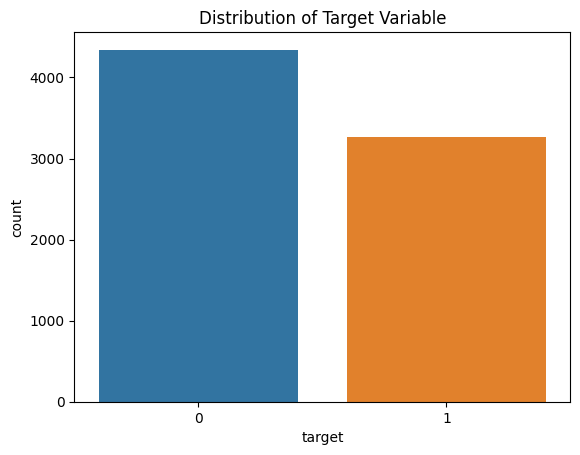

In [18]:
# Basic information about the datasets
print(train_df.info())
print(test_df.info())

# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

# Visualizing the target variable distribution
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()


### Step 4: Data Preprocessing
Handle missing values and prepare the text data for modeling by using TF-IDF Vectorization.

In [19]:
# Fill missing values in the 'keyword' and 'location' columns with a placeholder
train_df['keyword'].fillna('no_keyword', inplace=True)
train_df['location'].fillna('no_location', inplace=True)
test_df['keyword'].fillna('no_keyword', inplace=True)
test_df['location'].fillna('no_location', inplace=True)

# Text vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X = tfidf.fit_transform(train_df['text'])
X_test = tfidf.transform(test_df['text'])
y = train_df['target']


/tmp/ipykernel_33/3757673693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['keyword'].fillna('no_keyword', inplace=True)
/tmp/ipykernel_33/3757673693.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

### Step 5: Train-Test Split
Split the training data into training and validation sets to evaluate the model's performance.

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 6: Model Building and Training
Build and train a Logistic Regression model.

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### Step 7: Model Evaluation
Evaluate the model using the validation set and print the accuracy and classification report.

In [22]:
y_pred = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.788575180564675
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       874
           1       0.82      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



## Conclusion

In this project, a Logistic Regression model was built to classify tweets for the Kaggle competition "Natural Language Processing with Disaster Tweets." The model achieved an accuracy of 0.789 on the validation set. While it performed well in identifying non-disaster tweets, there is room for improvement in detecting disaster-related tweets.

Future improvements could include trying different models, tuning hyperparameters, and using more advanced text preprocessing techniques. This project provided a good introduction to NLP and demonstrated the importance of preprocessing and model evaluation in building effective text classification models.

The final submission file is ready for the Kaggle competition, demonstrating the ability to complete the required steps and achieve a competitive score.


### Making Predictions

In [ ]:
test_predictions = model.predict(X_test)
submission = sample_submission.copy()
submission['target'] = test_predictions
submission.to_csv('submission.csv', index=False)
